<a href="https://colab.research.google.com/github/maggiesam/BEDU-DataScience/blob/main/Machine%20Learning/Equipo_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/dataframe-junto.csv', index_col=0)
df = data.copy() 

In [ ]:
data

,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,47286,43031,4255,maiz
1,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,11950,10570,1380,frijol
2,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,39600,17684,21916,maiz
3,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,10819,6602,4217,frijol
4,Aguascalientes,1,2007,NPS,17.2,13.320241,21.932079,4.860635,37727,31610,6117,maiz
...,...,...,...,...,...,...,...,...,...,...,...,...
12083,Zacatecas,11,2019,NPS,49.9,16.500000,24.200000,8.700000,116231,19604,96627,maiz
12084,Zacatecas,11,2019,NPS,49.9,16.500000,24.200000,8.700000,503813,242613,261200,frijol
12085,Zacatecas,11,2020,D0,0.0,16.300000,26.800000,5.900000,174370,72067,102303,maiz
12086,Zacatecas,11,2020,D0,0.0,16.300000,26.800000,5.900000,635812,489631,146181,frijol


In [ ]:
df['producto'].unique()

array(['maiz', 'frijol', 'trigo'], dtype=object)

In [ ]:
mapping = {'NPS':-1, 'D0':0, 'D1':1, 'D2':2, 'D3':3, 'D4':4}
df['Tipo_sequia'] = df['Tipo_sequia'].map(mapping)

In [ ]:
mapping = {'maiz':1, 'frijol':2, 'trigo':3}
df['producto'] = df['producto'].map(mapping)

In [ ]:
df

,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,Aguascalientes,1,2005,0,0.0,12.699696,22.643727,2.755665,47286,43031,4255,1
1,Aguascalientes,1,2005,0,0.0,12.699696,22.643727,2.755665,11950,10570,1380,2
2,Aguascalientes,1,2006,1,4.8,13.128922,24.114734,2.143109,39600,17684,21916,1
3,Aguascalientes,1,2006,1,4.8,13.128922,24.114734,2.143109,10819,6602,4217,2
4,Aguascalientes,1,2007,0,17.2,13.320241,21.932079,4.860635,37727,31610,6117,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12083,Zacatecas,11,2019,0,49.9,16.500000,24.200000,8.700000,116231,19604,96627,1
12084,Zacatecas,11,2019,0,49.9,16.500000,24.200000,8.700000,503813,242613,261200,2
12085,Zacatecas,11,2020,1,0.0,16.300000,26.800000,5.900000,174370,72067,102303,1
12086,Zacatecas,11,2020,1,0.0,16.300000,26.800000,5.900000,635812,489631,146181,2


In [ ]:
std_scaler = StandardScaler()
data_cluster = df.iloc[:,3:]
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [ ]:
data_cluster

,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,-0.628916,-0.820044,-1.830640,-1.446769,-2.010085,-0.054079,0.182410,-0.263735,-1.083748
1,-0.628916,-0.820044,-1.830640,-1.446769,-2.010085,-0.350458,-0.230729,-0.300224,0.247318
2,0.418959,-0.772973,-1.744545,-1.107579,-2.112740,-0.118545,-0.140187,-0.039584,-1.083748
3,0.418959,-0.772973,-1.744545,-1.107579,-2.112740,-0.359944,-0.281230,-0.264217,0.247318
4,-0.628916,-0.651373,-1.706169,-1.610863,-1.657325,-0.134254,0.037053,-0.240102,-1.083748
...,...,...,...,...,...,...,...,...,...
12083,-0.628916,-0.330703,-1.068359,-1.087918,-1.013908,0.524194,-0.115751,0.908636,-1.083748
12084,-0.628916,-0.330703,-1.068359,-1.087918,-1.013908,3.775022,2.722540,2.997371,0.247318
12085,0.418959,-0.820044,-1.108476,-0.488401,-1.483144,1.011833,0.551959,0.980675,-1.083748
12086,0.418959,-0.820044,-1.108476,-0.488401,-1.483144,4.882157,5.866398,1.537568,0.247318


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

In [ ]:
print("Varianza acumulada explicada por mis dos nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por mis dos nuevas variables: 61.44%


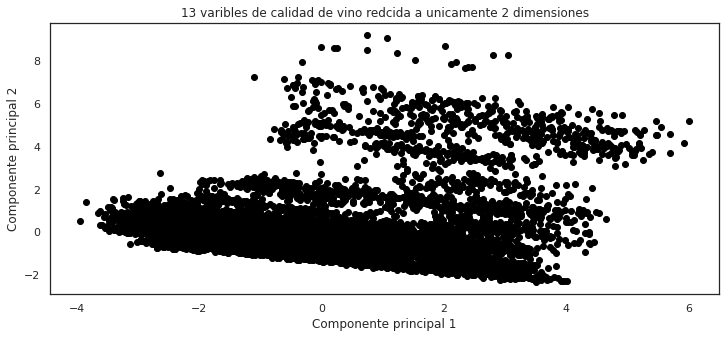

In [ ]:
sns.set(style="white", rc={"figure.figsize":(12,5)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], color='black')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("13 varibles de calidad de vino redcida a unicamente 2 dimensiones")

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters=i, init="k-means++", random_state=18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++', n_init=15, max_iter=500,random_state=18)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

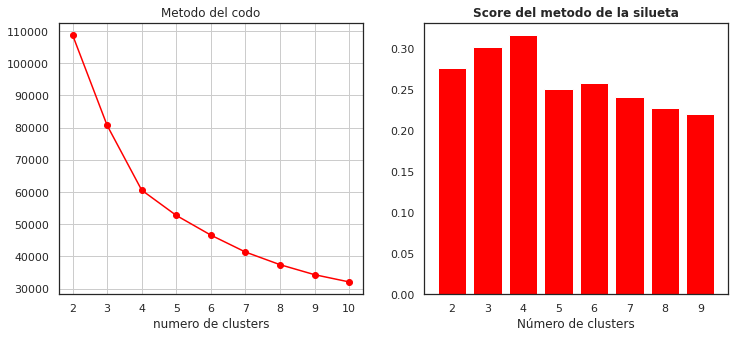

In [ ]:
# Vamos a graficar el metodo del codo y su complementario
sns.set(style="white", rc={"figure.figsize":(12,5)})
plt.subplot(1,2,1)

plt.plot(range(2,len(inertia)+2), inertia, marker="o", color ="red")
plt.xlabel("numero de clusters")
plt.title("Metodo del codo")
plt.grid(True)

plt.subplot(1,2,2)


plt.bar(range(len(silhouette)), list(silhouette.values()), align ="center", color ="red")
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.title("Score del metodo de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()
# Elegimos la barra mas grande en la silueta y el punto donde se separa poco en el metodo del codo
# en este caso el mejor numero de cluster es 3

In [ ]:
kmeans = cluster.KMeans(n_clusters=4, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

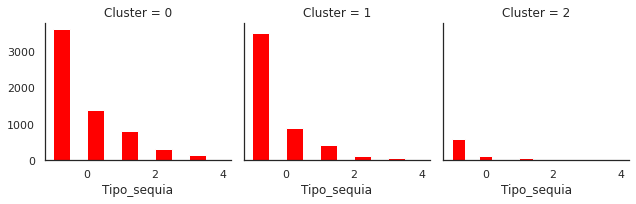

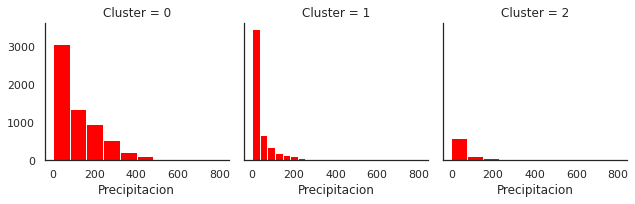

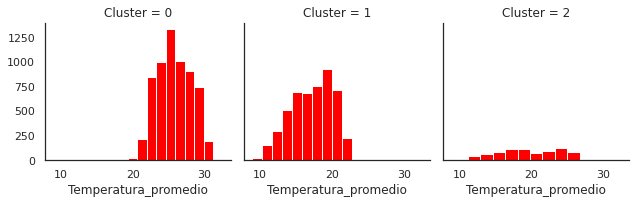

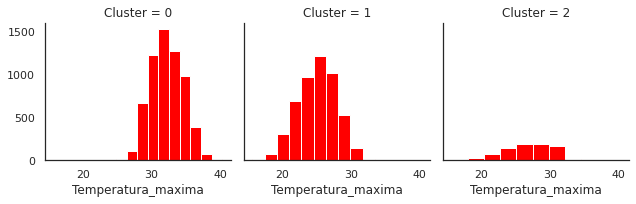

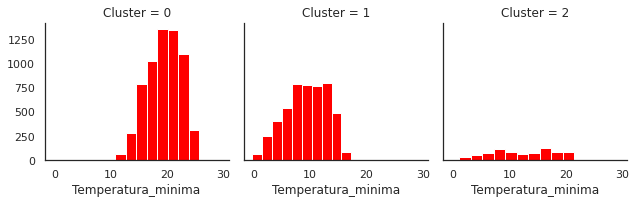

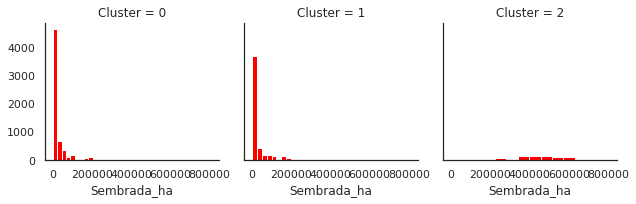

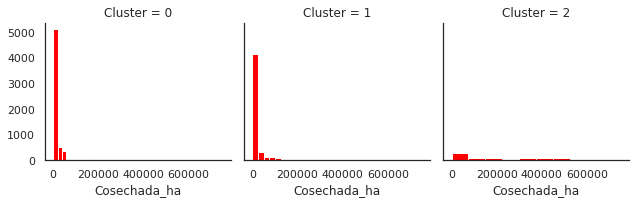

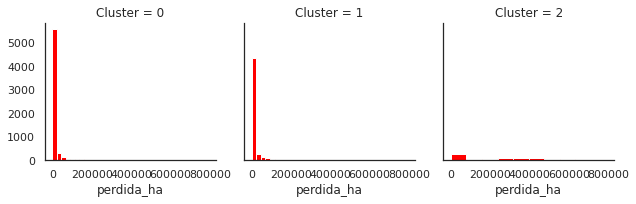

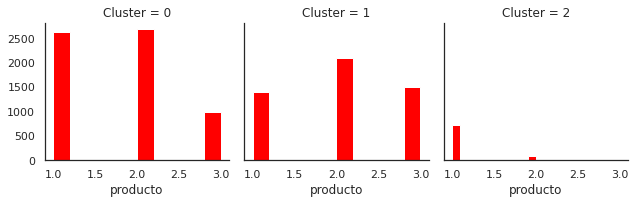

In [ ]:
data2 = df.iloc[:, 3:].copy()
data2['Cluster'] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(data2, col="Cluster")
  grid.map(plt.hist, cluster, color='red')

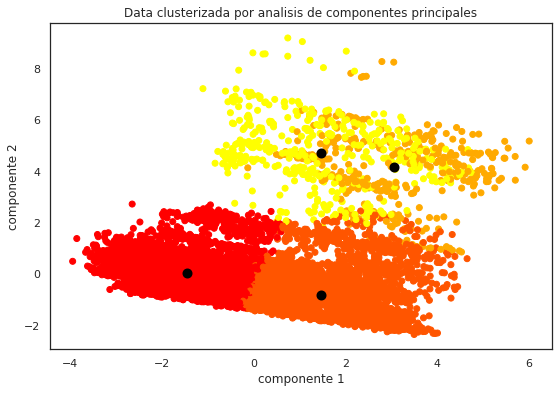

In [ ]:
sns.set(style="white", rc={"figure.figsize":(9,6)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap="autumn")
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='o', color="black", linewidths=4, zorder=10)
plt.title("Data clusterizada por analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

plt.show()

# KNN

In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/dataframe-junto.csv')
df.head()

,Unnamed: 0,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,0,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,47286,43031,4255,maiz
1,1,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,11950,10570,1380,frijol
2,2,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,39600,17684,21916,maiz
3,3,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,10819,6602,4217,frijol
4,4,Aguascalientes,1,2007,NPS,17.2,13.320241,21.932079,4.860635,37727,31610,6117,maiz


In [ ]:
mapping = {'NPS':0,'D0':1, 'D1':1, 'D2':1, 'D3':1, 'D4':1}
df['class'] =  df['Tipo_sequia'].map(mapping)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
datos = df[['Precipitacion', 'Temperatura_promedio', 'Temperatura_maxima', 'Temperatura_minima', 'class']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_training = scaler.fit_transform(datos)

scaled_training_df = pd.DataFrame(scaled_training, columns=datos.columns.values)
scaled_training_df

,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,class
0,0.000000,0.161223,0.282617,0.102884,0.0
1,0.000000,0.161223,0.282617,0.102884,0.0
2,0.005981,0.179406,0.342385,0.082260,1.0
3,0.005981,0.179406,0.342385,0.082260,1.0
4,0.021433,0.187510,0.253702,0.173759,0.0
...,...,...,...,...,...
12083,0.062181,0.322211,0.345849,0.303030,0.0
12084,0.062181,0.322211,0.345849,0.303030,0.0
12085,0.000000,0.313738,0.451488,0.208754,1.0
12086,0.000000,0.313738,0.451488,0.208754,1.0


In [ ]:
datos_training = datos.iloc[:12050, :]
datos_testing = datos.iloc[12050:, :]

In [ ]:
X = np.array(datos_training.drop(['class'], 1))
y = np.array(datos_training['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Text(0, 0.5, 'Mean Error')

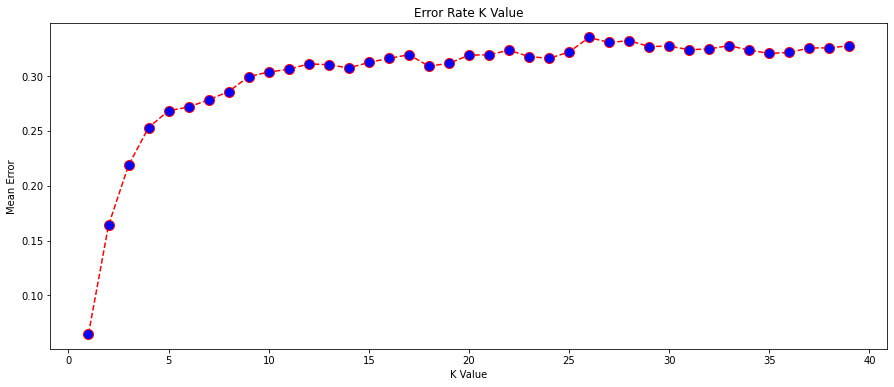

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
##K neighbors
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred)
print("Precision: ", precision, "\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:  ", accuracy, "\n")

target_name = ['class 0', 'class 1']
reporte = classification_report(y_test, y_pred, target_names=target_name)
print('Classification report:')
print(reporte)

Precision:  0.9010238907849829 

Accuracy:   0.9352697095435685 

Classification report:
              precision    recall  f1-score   support

     class 0       0.95      0.94      0.95      1549
     class 1       0.90      0.92      0.91       861

    accuracy                           0.94      2410
   macro avg       0.93      0.93      0.93      2410
weighted avg       0.94      0.94      0.94      2410



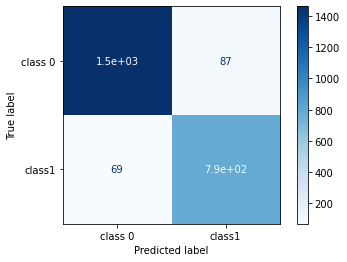

In [ ]:
#Confusion Matrix
class_names = ['class 0', 'class1']

titles_options = [("Confusion matrix", None)]
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)


True Positve Rate(sensitivity):  0.6399535423925667
False Positive Rate(specificity):  0.3520550893049279


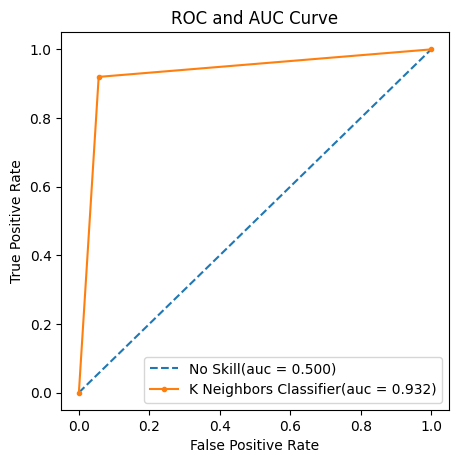

In [ ]:
#Create model No Skill
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
knn_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
auc_ns = auc(ns_fpr, ns_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
auc_knn = auc(knn_fpr, knn_tpr)

print("True Positve Rate(sensitivity): ", stats.mean(knn_tpr))
print("False Positive Rate(specificity): ", stats.mean(knn_fpr))

# plot the roc curve for the model
plt.figure(figsize=(5,5), dpi=100)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill(auc = %0.3f)'% auc_ns)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Neighbors Classifier(auc = %0.3f)' % auc_knn)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
tipo = df.iloc[12050:]['Tipo_sequia'].map(mapping)

In [ ]:
##K neighbors
prediccion_knn = knn.predict(datos_testing.drop(['class'],1))
out_knn = pd.DataFrame({ 'Tipo real' : tipo, 'predicted ': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
out_knn

Predicción Vecinos más Cercanos:


,Tipo real,predicted
12050,0,0
12051,0,0
12052,0,0
12053,0,0
12054,0,0
12055,0,0
12056,0,0
12057,0,0
12058,0,0
12059,1,0


# Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0, 0.5, 'Precision')

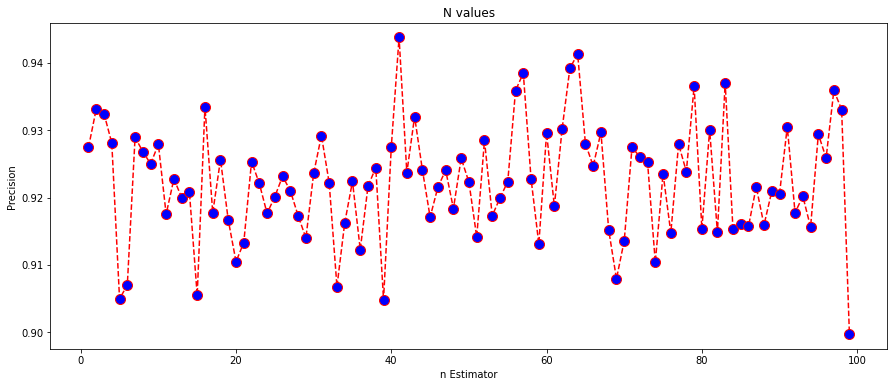

In [ ]:
preciciones = []

for i in range(1,100):
  algoritmo = RandomForestClassifier(n_estimators = 6, criterion = 'gini')
  algoritmo.fit(X_train, y_train)
  y_pred = algoritmo.predict(X_test)
  preciciones.append(precision_score(y_test, y_pred))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 100), preciciones, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('N values')
plt.xlabel('n Estimator')
plt.ylabel('Precision')

In [ ]:
#Defino el algoritmo a utilizar
#Bosques Aleatorios
algoritmo = RandomForestClassifier(n_estimators = 41, criterion = 'gini')

#Entreno el modelo
algoritmo.fit(X_train, y_train)

#Realizo una predicción
y_pred = algoritmo.predict(X_test)

#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Matriz de Confusión:
[[1502   59]
 [  74  775]]
Precisión del modelo:
0.9292565947242206


In [ ]:
prediccion_rf = algoritmo.predict(datos_testing.drop(['class'],1))

out_rf = pd.DataFrame({ 'Tipo real' : tipo, 'predicted ': prediccion_rf})
print('Predicción Random Forest:')
out_rf

Predicción Random Forest:


,Tipo real,predicted
12050,0,0
12051,0,0
12052,0,0
12053,0,0
12054,0,0
12055,0,0
12056,0,0
12057,0,0
12058,0,0
12059,1,0
